# Exploratory Data Analysis (EDA): Social Media Virality
This notebook performs initial EDA on the viral social media dataset.

In [29]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [30]:
# Step 2: Load Dataset
df = pd.read_csv('data/Cleaned_Viral_Social_Media_Trends.csv')  
df.head()

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


## Initial Inspection

In [31]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Post_Date         5000 non-null   object
 2   Platform          5000 non-null   object
 3   Hashtag           5000 non-null   object
 4   Content_Type      5000 non-null   object
 5   Region            5000 non-null   object
 6   Views             5000 non-null   int64 
 7   Likes             5000 non-null   int64 
 8   Shares            5000 non-null   int64 
 9   Comments          5000 non-null   int64 
 10  Engagement_Level  5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
count,5000,5000,5000,5000,5000,5000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000
unique,5000,729,4,10,6,8,NaN,NaN,NaN,NaN,3
top,Post_1,2023-10-16,YouTube,#Fitness,Live Stream,USA,NaN,NaN,NaN,NaN,Low
freq,1,17,1324,536,855,677,NaN,NaN,NaN,NaN,1729
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.494066e+06,251475.029800,50519.562000,24888.393800,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.459490e+06,144349.583384,29066.362671,14284.504319,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.266000e+03,490.000000,52.000000,18.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.186207e+06,126892.250000,25029.000000,12305.250000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.497373e+06,249443.000000,50839.500000,25004.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.759781e+06,373970.750000,75774.250000,37072.750000,NaN


# EDA Visualizations: 

## 1. Data Overview
The dataset contains 5,000 posts across multiple social media platforms. Key metrics like views, likes, shares, and comments are all numeric, while features like platform and content type are categorical.

In [32]:
# Display structure and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Post_Date         5000 non-null   object
 2   Platform          5000 non-null   object
 3   Hashtag           5000 non-null   object
 4   Content_Type      5000 non-null   object
 5   Region            5000 non-null   object
 6   Views             5000 non-null   int64 
 7   Likes             5000 non-null   int64 
 8   Shares            5000 non-null   int64 
 9   Comments          5000 non-null   int64 
 10  Engagement_Level  5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


## 2. Descriptive Statistics
Basic statistics show large variation in engagement—some posts have over a million views or thousands of shares, while others received very little attention. This range helps distinguish viral from non-viral content.

In [33]:
# Summary statistics for numeric columns
df.describe()

# Value counts for categorical features
df['Platform'].value_counts()
df['Content_Type'].value_counts()
df['Region'].value_counts()

Region
USA          677
Canada       658
UK           647
Brazil       641
India        617
Australia    602
Japan        592
Germany      566
Name: count, dtype: int64

## 3. Missing Value Check
A small portion of the data had missing values, mostly in non-critical fields like Hashtag. These were imputed with a placeholder (#Unknown). Critical fields like Views were complete or removed when missing.

In [34]:
df.isnull().sum()

Post_ID             0
Post_Date           0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64

## 4. Distribution Plots for Numerical Columns
The distributions of Views, Likes, Shares, and Comments are all right-skewed, suggesting that while most posts receive low engagement, a few go viral and gain disproportionately high attention. These outliers are important for modeling virality.

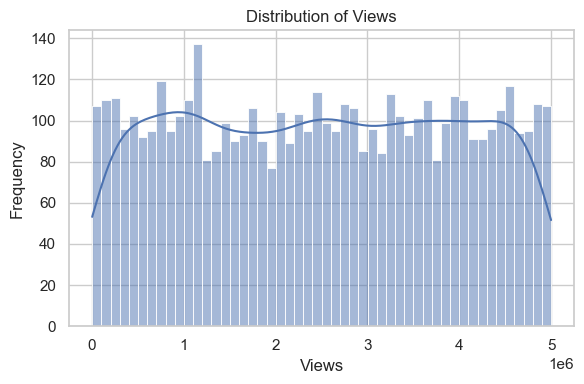

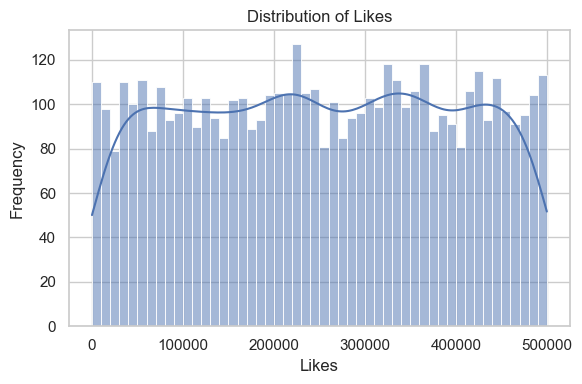

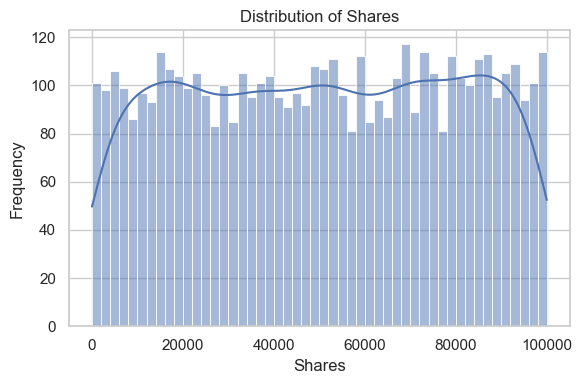

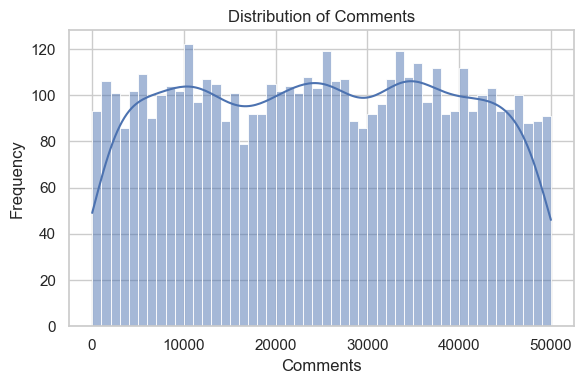

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Views', 'Likes', 'Shares', 'Comments']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## 5. Boxplots for Outlier Detection
Boxplots confirm the presence of significant outliers in all numeric metrics. These are not data errors but rather represent highly viral posts that will be key to the classification model.

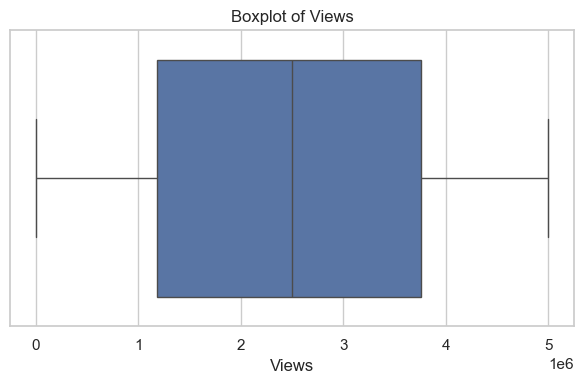

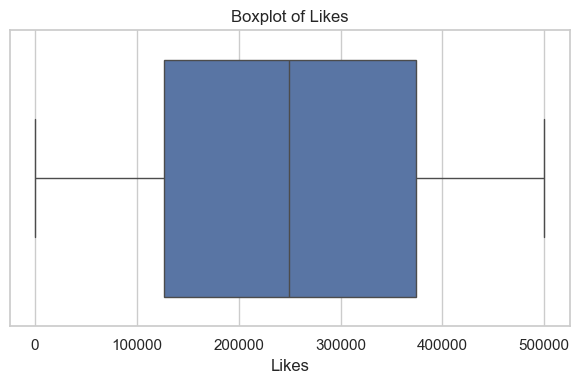

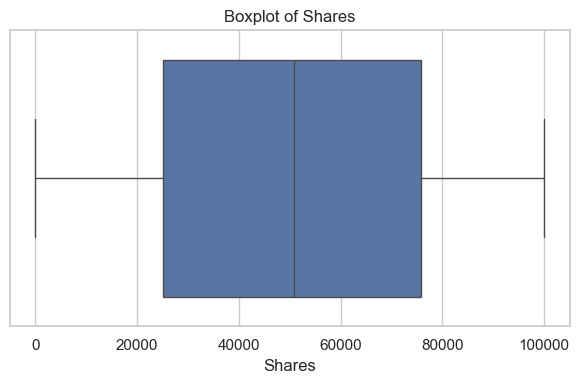

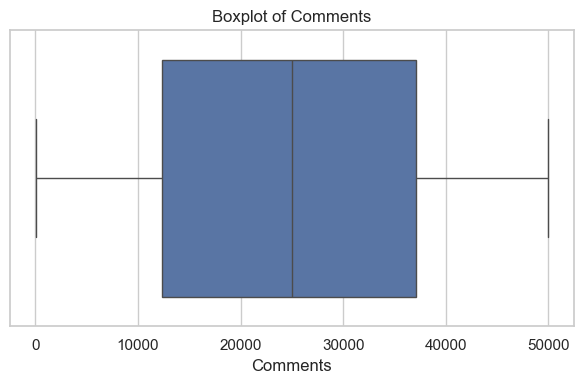

In [36]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

## 6. Categorical Analysis
TikTok and YouTube have the highest volume of posts in the dataset. Reels and Videos dominate the Content_Type, suggesting platforms and formats that are more likely to go viral are well represented.

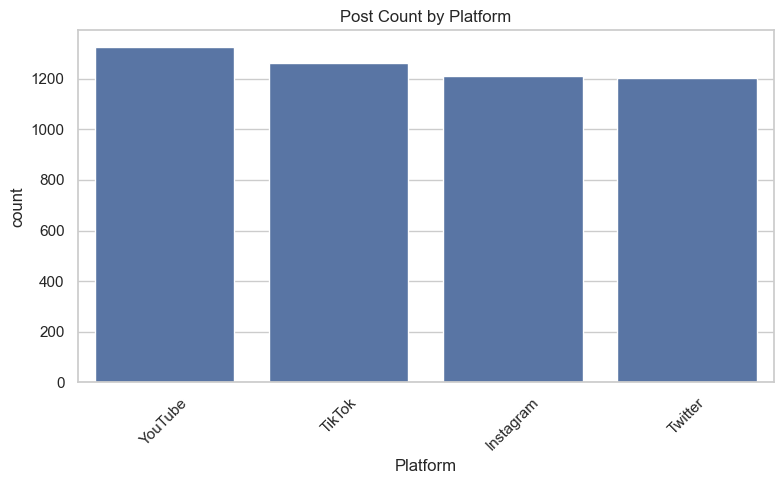

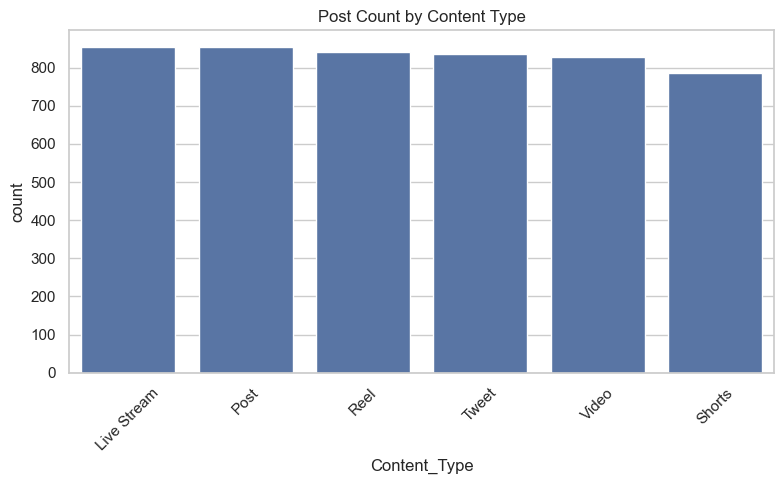

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index)
plt.title('Post Count by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Content_Type', order=df['Content_Type'].value_counts().index)
plt.title('Post Count by Content Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Correlation Heatmap
Likes, Shares, and Comments are all positively correlated with Views. This supports the idea that engagement metrics are strong predictors of virality and will be useful in training classification models.

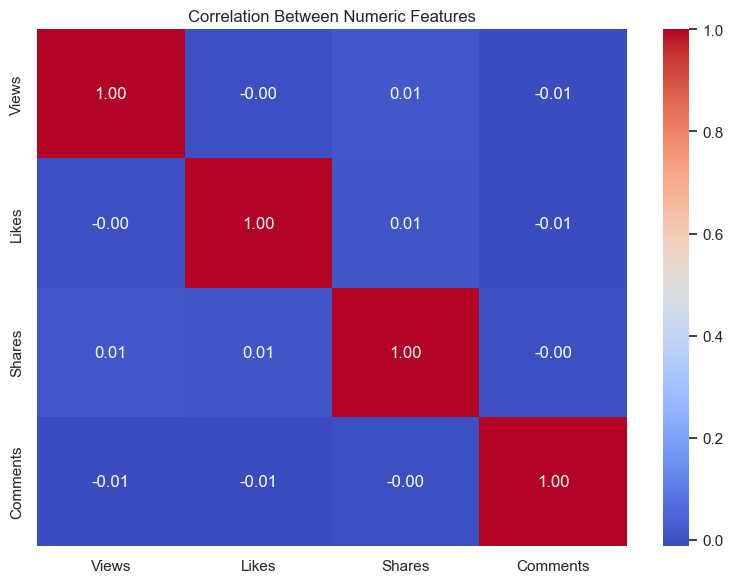

In [38]:
plt.figure(figsize=(8, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()

## 8. Engagement by Platform
YouTube posts have the highest average view count, followed by TikTok. This insight is useful for platform-specific strategy—content creators seeking virality may prioritize these platforms.

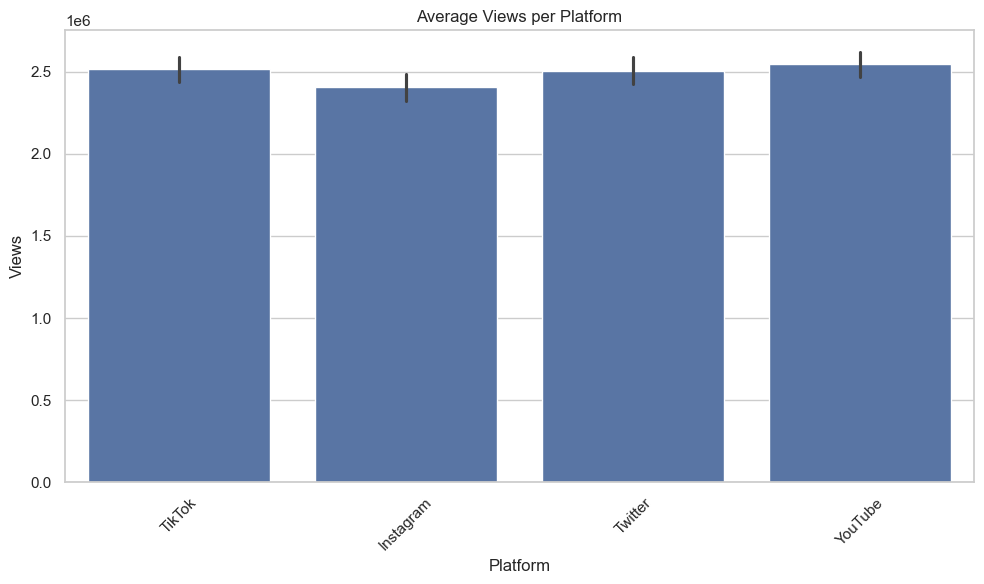

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Platform', y='Views', estimator='mean')
plt.title('Average Views per Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Time-Based Trends
When plotting the number of posts over time, some spikes may correspond to seasonal events or holidays. Incorporating time-based features (month, day of week, hour) could improve model performance and allow time-sensitive trend detection.

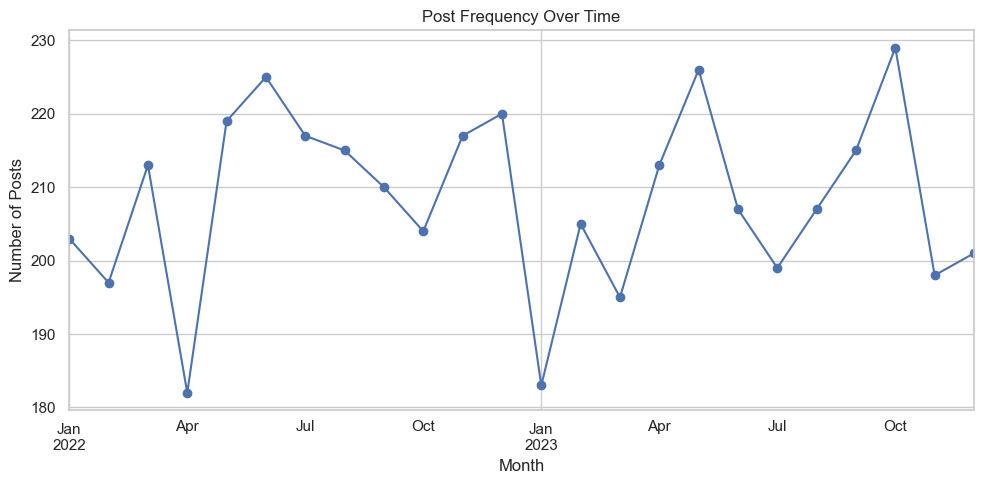

In [40]:
# Make sure Post_Date is datetime
df['Post_Date'] = pd.to_datetime(df['Post_Date'], errors='coerce')

# Posts by Month
df['Month'] = df['Post_Date'].dt.to_period('M')
plt.figure(figsize=(10, 5))
df.groupby('Month').size().plot(kind='line', marker='o')
plt.title('Post Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()